In [134]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
# dataset have?
import pandas as pd
df=pd.read_excel("flight_price.xlsx")
df.shape
"""The dataset has 10683 rows and 11 columns """


'The dataset has 10683 rows and 11 columns '

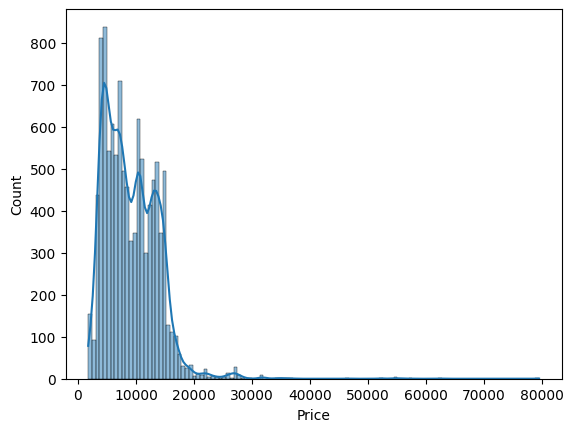

In [10]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
# distribution.
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x='Price',data=df,kde=True)
plt.show()

In [15]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
max_price = df["Price"].max()
min_price = df["Price"].min()


In [16]:
max_price,min_price

(79512, 1759)

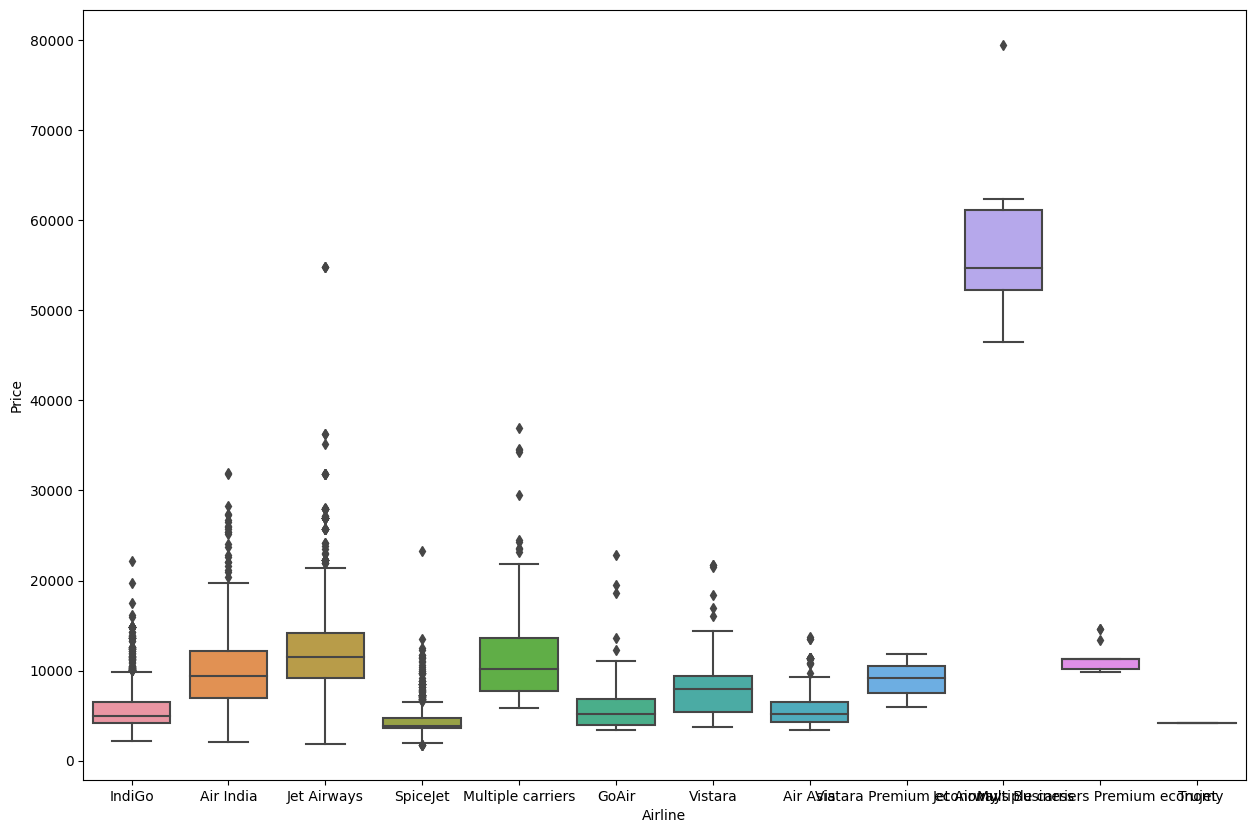

In [24]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
# airlines.

import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,10))
sns.boxplot(y="Price", x="Airline",data=df)
plt.show()


In [28]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [30]:
import plotly.express as px
fig = px.box(df, x="Airline", y="Price", height=600, width=1000)
fig.show()


In [31]:
"""obsevations :(1) lowest price ticket is of spicejet,highest price ticket is jet airways business
(2)median salary of indigo ,goair,airasia is approximately same
"""

8372.0

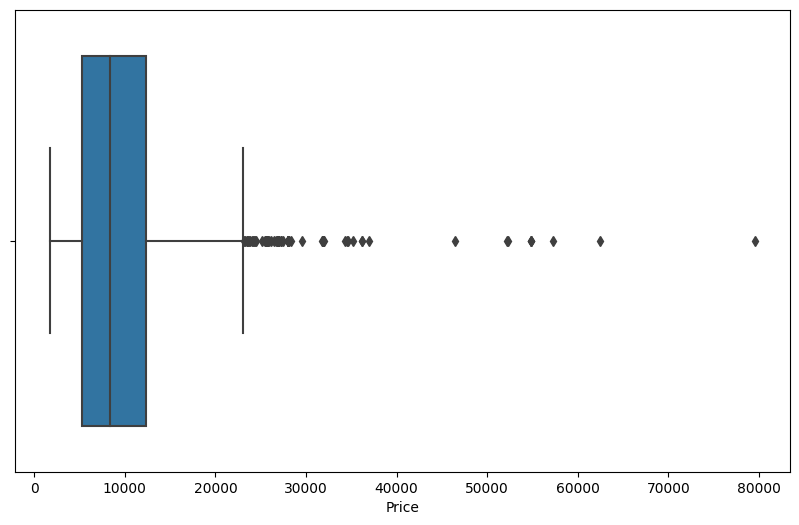

In [32]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
# they may impact your analysis.

import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,6))
sns.boxplot(x=df["Price"])
plt.show()



In [39]:
"""outliers are the data point that are outside the 1.5 times of the interquartile range there are many data points
that we can see in the boxplot that are outside this range .Based on the boxplot, it appears that there are several 
potential outliers in the "Price" column. Outliers are defined as data points that fall outside the whiskers of the 
boxplot, which are calculated as 1.5 times the interquartile range  above the third quartile  and below the
 first quartile .

The points outside this range may be due to fluctuations , or unssen events . All of these will make calculation 
where there may be anomalies.
 
 
  these potential outliers are errors or anomalies in the data, they could impact the accuracy of
   any statistical analysis performed on the dataset. Therefore, it's important to carefully consider any potential 
   outliers and determine whether they are genuine data points . If they are determined to be anomalies,
     they may need to be removed from the dataset before any further analysis is performed."""

import pandas as pd


Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]

import plotly.express as px
fig = px.box(df_filtered, x="Airline", y="Price", height=600, width=1000)
fig.show()





In [ ]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
# to identify the peak travel season. What features would you analyze to identify the peak season, and how
# would you present your findings to your boss?


C:\Users\mukka\AppData\Local\Temp\ipykernel_5024\1561020905.py:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



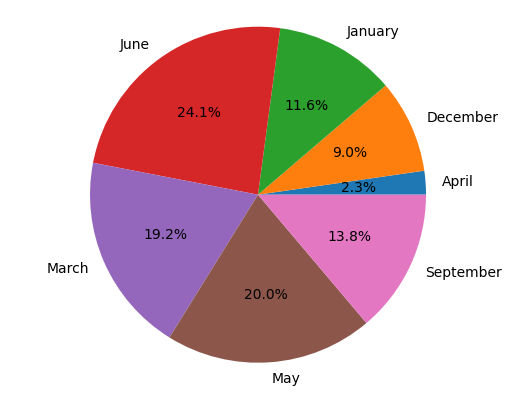

In [133]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("flight_price.xlsx")
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Month"] = df["Date_of_Journey"].dt.month
df["Month_Name"] = df["Month"].apply(lambda x: calendar.month_name[x])
df_final = pd.DataFrame({"Month_Name": df["Month_Name"], "Price": df["Price"]})
df_final = df_final.groupby("Month_Name")["Price"].sum().reset_index()
plt.pie(df_final["Price"], labels=df_final["Month_Name"], autopct="%1.1f%%")
plt.axis("equal")
plt.show()

"""THE PEAK SEASON IS MARCH,MAY,JUNE and in these three months approx 65 percent revenue is earned by the company"""


In [160]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these
# trends, and what visualizations would you use to present your findings to your team?
# Line charts: To visualize the trends in flight prices over time or by departure time.

import pandas as pd
flight_df=pd.read_excel("flight_price.xlsx")
flight_df.info()
flight_df.describe
flight_df.isnull().head()
flight_df.isnull().sum()
flight_df.dropna(inplace = True)
flight_df[flight_df.duplicated()].head()
flight_df.drop_duplicates(keep='first',inplace=True)
flight_df.head()
flight_df["Route"].unique()

 








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

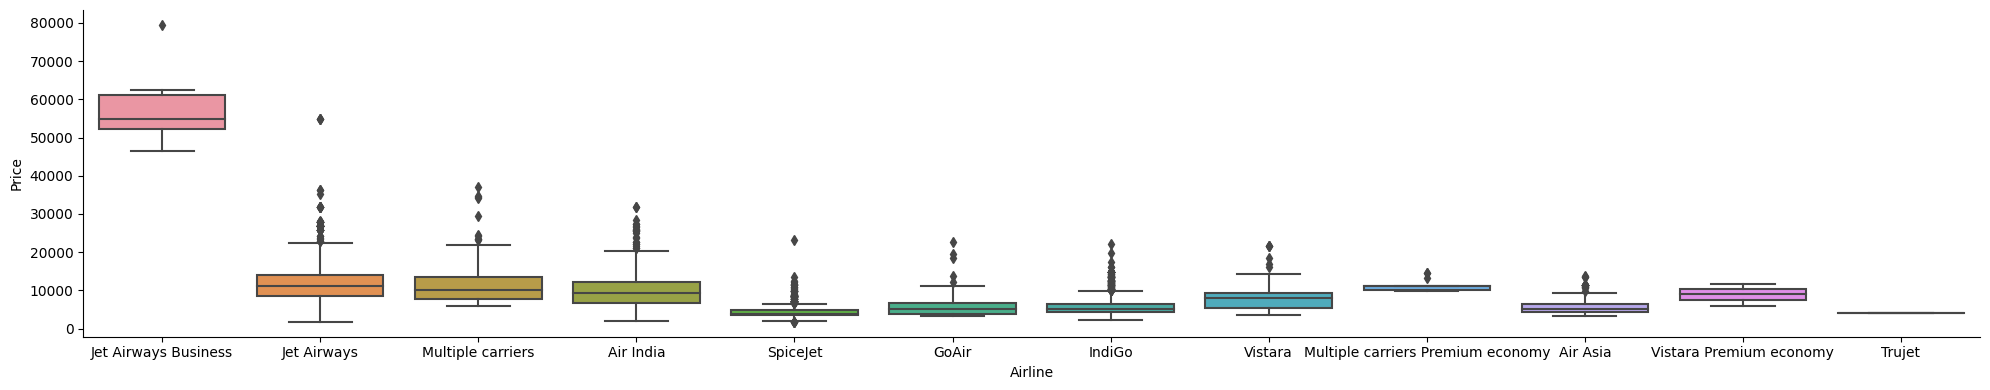

'jet airways has most outliers in terms of price '

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(y = "Price", x = "Airline", data = flight_df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 5)
plt.show()

"""jet airways has most outliers in terms of price """

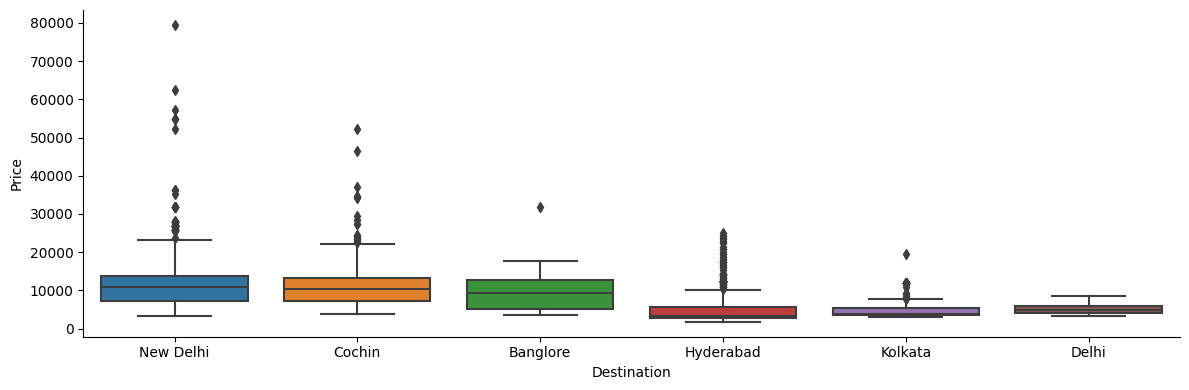

In [165]:
sns.catplot(y = "Price", x = "Destination", data = flight_df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [ ]:
"""new delhi has most outliers and kolkata has least outliers"""

In [166]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [176]:
flight_df["month"]=flight_df["Date_of_Journey"].str.split("/").str[1]



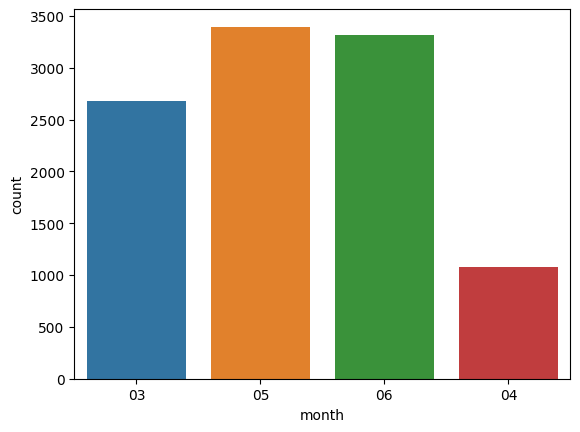

In [182]:
ax=sns.countplot(x="month",data=flight_df)
plt.show()

In [177]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,03
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,05
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,06
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,03


In [ ]:
"""OBSERVATION- may has the largest number of flights  and the april has least number of flights """

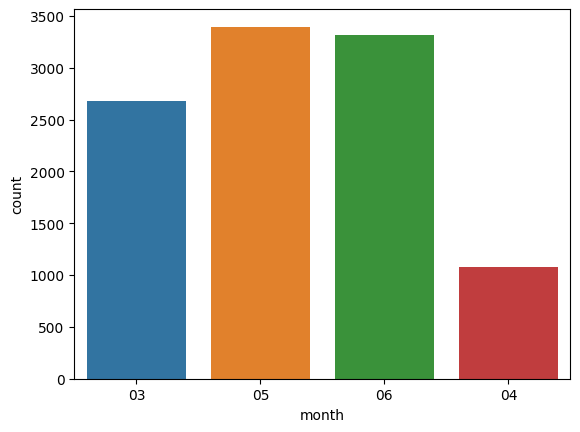

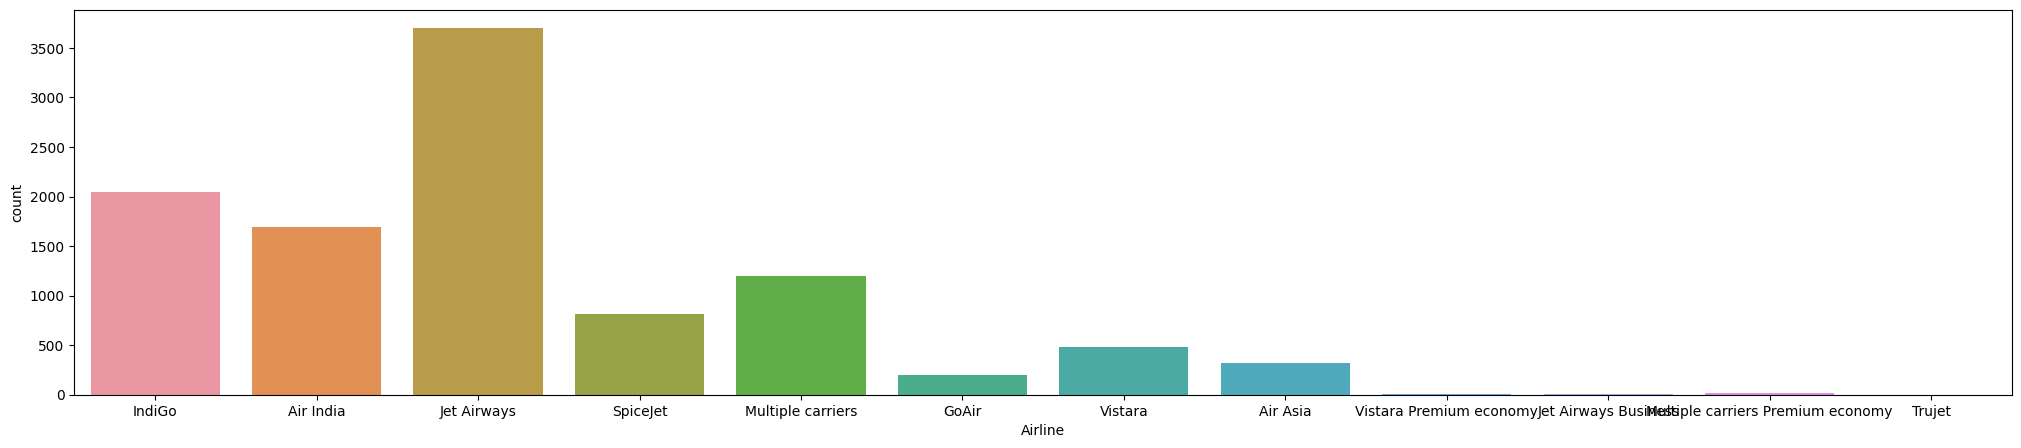

In [191]:
plt.figure(figsize = (25,5))
plt.xlabel('Airline company')
plt.ylabel('number  of flights')
ax=sns.countplot(x = 'Airline', data =flight_df)

In [ ]:
"""jet airways has highest no of flightd followed by IndiGo and AirIndia"""

In [206]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
# Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
# identify these factors, and how would you present your findings to the management team?

import pandas as pd 
flight_df=pd.read_excel("flight_price.xlsx")
flight_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [232]:

flight_df["month"]=flight_df["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,year,duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,2019,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,2019,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,2019,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,2019,285


In [233]:
flight_df["year"]=flight_df["Date_of_Journey"].str.split("/").str[2].astype(int)
flight_df.drop(["Date_of_Journey"],axis=1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,year,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,2019,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,2019,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,2019,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,2019,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,2019,150
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4,2019,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4,2019,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,2019,160


In [234]:
flight_df["duration_min"]=flight_df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [ ]:

flight_df=flight_df.drop(["duratione"],axis=1)

In [236]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,year,duration_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,2019,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,2019,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,2019,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,2019,285


In [243]:
flight_df.info()
flight_df.head()
flight_df=flight_df.drop(["year"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  month            10683 non-null  int32 
 11  year             10683 non-null  int32 
 12  duration_min     10683 non-null  int64 
 13  Dep_hour         10683 non-null  int64 
 14  Dep_min          10683 non-null  int64 
dtypes: int32(2), int64(4), object(9)
memory usage: 1.1+ MB


In [ ]:
flight_df["Dep_hour"] = pd.to_datetime(flight_df["Dep_Time"]).dt.hour
flight_df["Dep_min"] = pd.to_datetime(flight_df["Dep_Time"]).dt.minute
flight_df.drop(["Dep_Time"], axis = 1, inplace = True)

C:\Users\mukka\AppData\Local\Temp\ipykernel_5024\4111067471.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



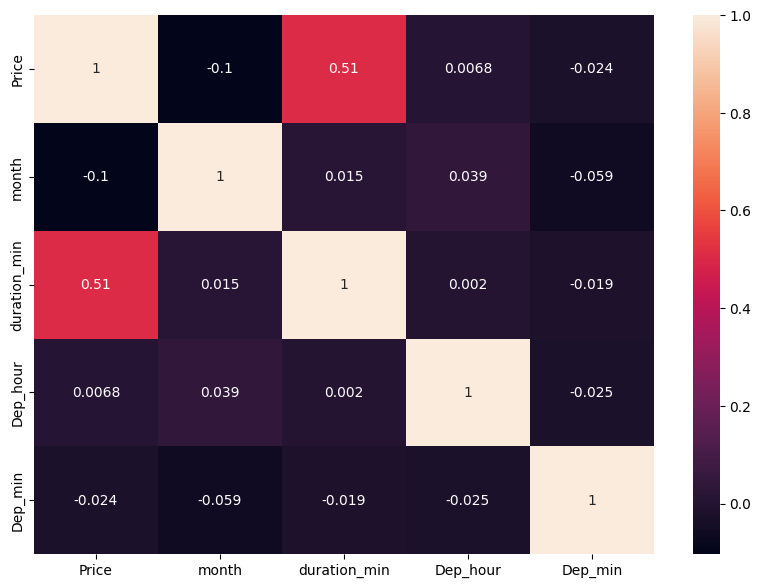

In [247]:
plt.figure(figsize = (10,7))
sns.heatmap(flight_df.corr(), annot = True)
plt.show()

In [ ]:
"""FROM THE ABOVE CORRELATION CHART WE CAN SAY THAT FLIGHT PRICE IS MOST POSITIVELY CORRELATED TO THE DURATION 
WITH THE CORRELATION VALUE OF 0.51"""